In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### Introduction of the project
In this project we want to predict whether a person has a heart disease or not based on the data about his/ her health. The data includes some key metrics like BMI, Smoking, Alcohol Drinking, Meantal Health Diabetic and much more. We plan to do a comparative study between three machine learning models random forest, xgboost and Support Vector Machine. Currently we have trained three Random Forest Models at different max_depths: 4, 8, 12. Here we will be presenting to you our observation about this models and drawbacks about the models. 
Total Size of the Dataset is 3,19,795

In [3]:
print(len(df))

319795


In [4]:
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


In [5]:
from sklearn import preprocessing

Categorical_Columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Race','Diabetic','PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease','SkinCancer']

le = preprocessing.LabelEncoder()

for col in Categorical_Columns:
    df[col] = le.fit_transform(df[col])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [6]:
y = df.HeartDisease.values
print(y)

[0 0 0 ... 0 0 0]


In [7]:
X = df.drop('HeartDisease', axis = 1)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [8]:
from sklearn.model_selection import StratifiedKFold, train_test_split

X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score


skf = StratifiedKFold(n_splits=5)
max_depths = [4,8,12]
all_models = []
for max_depth in max_depths:
    all_acc = []
    all_roc = []
    fold = 0
    print(f'Performance of the model for a max_depth of {max_depth}')
    for train_index, test_index in skf.split(X_train_valid, y_train_valid):
        # print("TRAIN:", train_index, "TEST:", test_index)
        print(f'Running through {fold}th fold')
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf = RandomForestClassifier(max_depth=max_depth, random_state=69)
        rf.fit(X_train, y_train)
        y_preds = rf.predict(X_test)
        y_pred_proba = rf.predict_proba(X_test)
        valid_acc = accuracy_score(y_test, y_preds)
        valid_roc = roc_auc_score(y_test, y_pred_proba[:, 1])
        all_roc.append(valid_roc)
        all_acc.append(valid_acc)
        print(f'The Validation Accuracy is {valid_acc}')
        print(f'The Validation AUCROC Score is {valid_roc}')
        fold += 1
    print(f'The Mean Validation Accuracy is {np.mean(valid_acc)}')
    print(f'The Mean Validation AUCROC score is {np.mean(valid_roc)}')


    
    

Performance of the model for a max_depth of 4
Running through 0th fold
The Validation Accuracy is 0.9132791327913279
The Validation AUCROC Score is 0.8290761404146221
Running through 1th fold
The Validation Accuracy is 0.9158831745502304
The Validation AUCROC Score is 0.8225678557564191
Running through 2th fold
The Validation Accuracy is 0.9141737372052784
The Validation AUCROC Score is 0.8228066434827223
Running through 3th fold
The Validation Accuracy is 0.9145489795492923
The Validation AUCROC Score is 0.8216386123409152
Running through 4th fold
The Validation Accuracy is 0.9144238987679543
The Validation AUCROC Score is 0.8210092920757943
The Mean Validation Accuracy is 0.9144238987679543
The Mean Validation AUCROC score is 0.8210092920757943
Performance of the model for a max_depth of 8
Running through 0th fold
The Validation Accuracy is 0.9145716072545341
The Validation AUCROC Score is 0.8421219975512653
Running through 1th fold
The Validation Accuracy is 0.916571118847589
The Va

In [10]:
mean_val_acc = np.mean(all_acc)

print(f'The Mean Validation Accuracy is {mean_val_acc}')

The Mean Validation Accuracy is 0.9155291354455244


In [11]:
y_pred_test = rf.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)

print(f'The Accuracy of the test set is {test_acc}')

The Accuracy of the test set is 0.9157997873626718


In [12]:
from sklearn.metrics import confusion_matrix, roc_auc_score

y_predict_probab = rf.predict_proba(X_test)
print(confusion_matrix(y_test, y_pred_test))

[[43711   151]
 [ 3888   219]]


In [13]:
print(f'The roc_auc score of the model on the test data is {roc_auc_score(y_test, y_predict_probab[:, 1])}')

The roc_auc score of the model on the test data is 0.8401890235746914


In [14]:
cols = df.columns
print(cols)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')


Feature: HeartDisease , Score: 0.09640108628552518
Feature: BMI , Score: 0.027038438612552448
Feature: Smoking , Score: 0.006674827155092752
Feature: AlcoholDrinking , Score: 0.10827293250994578
Feature: Stroke , Score: 0.07976589477504009
Feature: PhysicalHealth , Score: 0.03798129217698945
Feature: MentalHealth , Score: 0.07635997315582681
Feature: DiffWalking , Score: 0.05008966163949901
Feature: Sex , Score: 0.19442794318032558
Feature: AgeCategory , Score: 0.027450114401091345
Feature: Race , Score: 0.07526656796615071
Feature: Diabetic , Score: 0.014988330538562342
Feature: PhysicalActivity , Score: 0.08418268455040212
Feature: GenHealth , Score: 0.05156799316538093
Feature: SleepTime , Score: 0.013789995412324807
Feature: Asthma , Score: 0.03858396062365238
Feature: KidneyDisease , Score: 0.017158303851638117


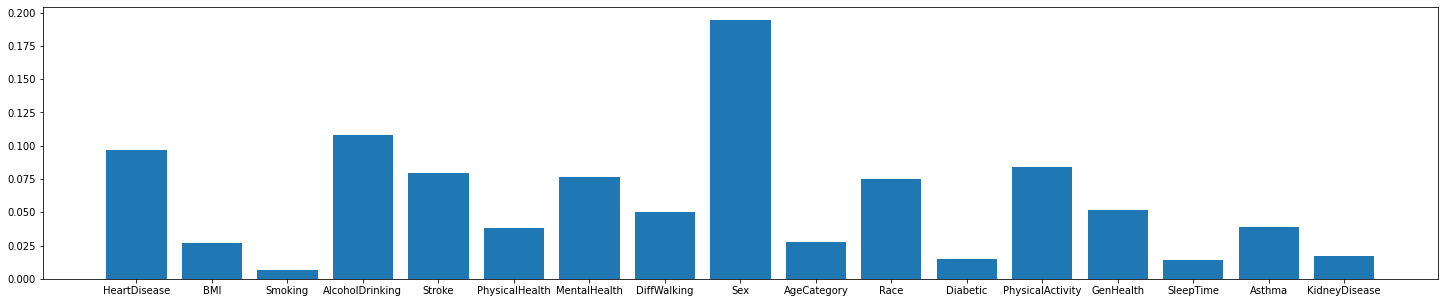

In [15]:
from matplotlib import pyplot as plt
cols = df.columns
importance = rf.feature_importances_
for i,v in enumerate(importance):
	print(f'Feature: {cols[i]} , Score: {v}')
    
plt.figure(figsize=(25, 5))
plt.bar([cols[x] for x in range(len(importance))], importance)
plt.show()